# Objectives

1 . Load and concat the datasets;

2 . Treat data types;

3 . Treat null values;

4 . Treat outliers;

5 . Create new target variable;

6 . Drop old target variable.

In [114]:
## importing packages

import pandas as pd
import seaborn as sns

from scipy import stats
import numpy as np

### 1 . Loading and concatenating the datasets

In [115]:
## loading the datasets

dfred = pd.read_csv('../data/raw/winequality-red.csv',sep=';')
dfwhite = pd.read_csv('../data/raw/winequality-white.csv',sep=';')

In [116]:
## inspecting the shapes

print(dfred.shape,dfwhite.shape)

print(f'The resulting dataset must have {dfred.shape[0] + dfwhite.shape[0]} rows.')

(1599, 12) (4898, 12)
The resulting dataset must have 6497 rows.


In [117]:
## Inspecting the columns

(dfred.columns == dfwhite.columns).any()

True

In [118]:
## concatenating the datasets

df = pd.concat([dfred,dfwhite])

In [119]:
## inspecting the resulting dataset

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [120]:
## treating columns names (i hate spaces and capital letters)

df.columns = [x.lower().replace(' ','_') for x in df.columns]

In [121]:
## nice

df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [122]:
df.reset_index(drop=True,inplace=True)

### 2 . Treat data types

In [123]:
## inspecting data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


##### No data types to treat!!!

### 3 . Treating null values

In [124]:
## inspecting null values

df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

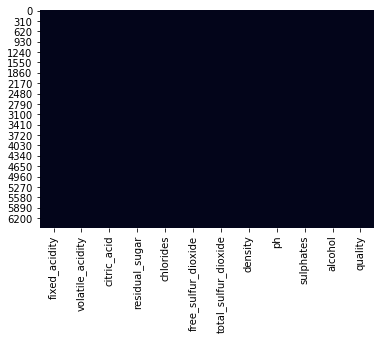

In [125]:
sns.heatmap(df.isna(),cbar=False);

##### No null values to be treated!

### 4 . Treating outliers

In [126]:
## using the z_score

z = np.abs(stats.zscore(df.drop('quality',axis=1)))
z

array([[0.14247327, 2.18883292, 2.19283252, ..., 1.81308951, 0.19309677,
        0.91546416],
       [0.45103572, 3.28223494, 2.19283252, ..., 0.11507303, 0.99957862,
        0.58006813],
       [0.45103572, 2.55330026, 1.91755268, ..., 0.25811972, 0.79795816,
        0.58006813],
       ...,
       [0.55179227, 0.6054167 , 0.88525328, ..., 1.42124765, 0.47897144,
        0.91546416],
       [1.32319841, 0.30169391, 0.12823371, ..., 0.75571005, 1.016626  ,
        1.9354021 ],
       [0.93749534, 0.78765037, 0.42232597, ..., 0.25811972, 1.41986693,
        1.09691202]])

In [130]:
## finding and droping outliers

outlier_index = set(np.where(z > 3)[0])

for index in outlier_index:
    df.drop(index=index,inplace=True)

KeyError: '[1] not found in axis'

### 5 . Creating new target variable